In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from livelossplot import PlotLossesKerasTF

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)
 
import datasets
import losses
import models
import build

In [2]:
base, trainable = models.ResNet44_IN()

In [3]:
dataset, n = datasets.SCUTFBP5500(input_shape=base.input_shape)
#dataset, n = datasets.MEBeauty(input_shape=base.input_shape)
dataset.generate(model=base, augment=0)

69/69 [==============================] - 2s 25ms/step
(3300, 14, 14, 1024) (2200, 14, 14, 1024)
(3300, 5) (2200, 5)


In [4]:
model = build.build(
    base.output_shape,
    trainable=trainable,
    n=n,
    augment=False,
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 1, 1, 2048)        14998528  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

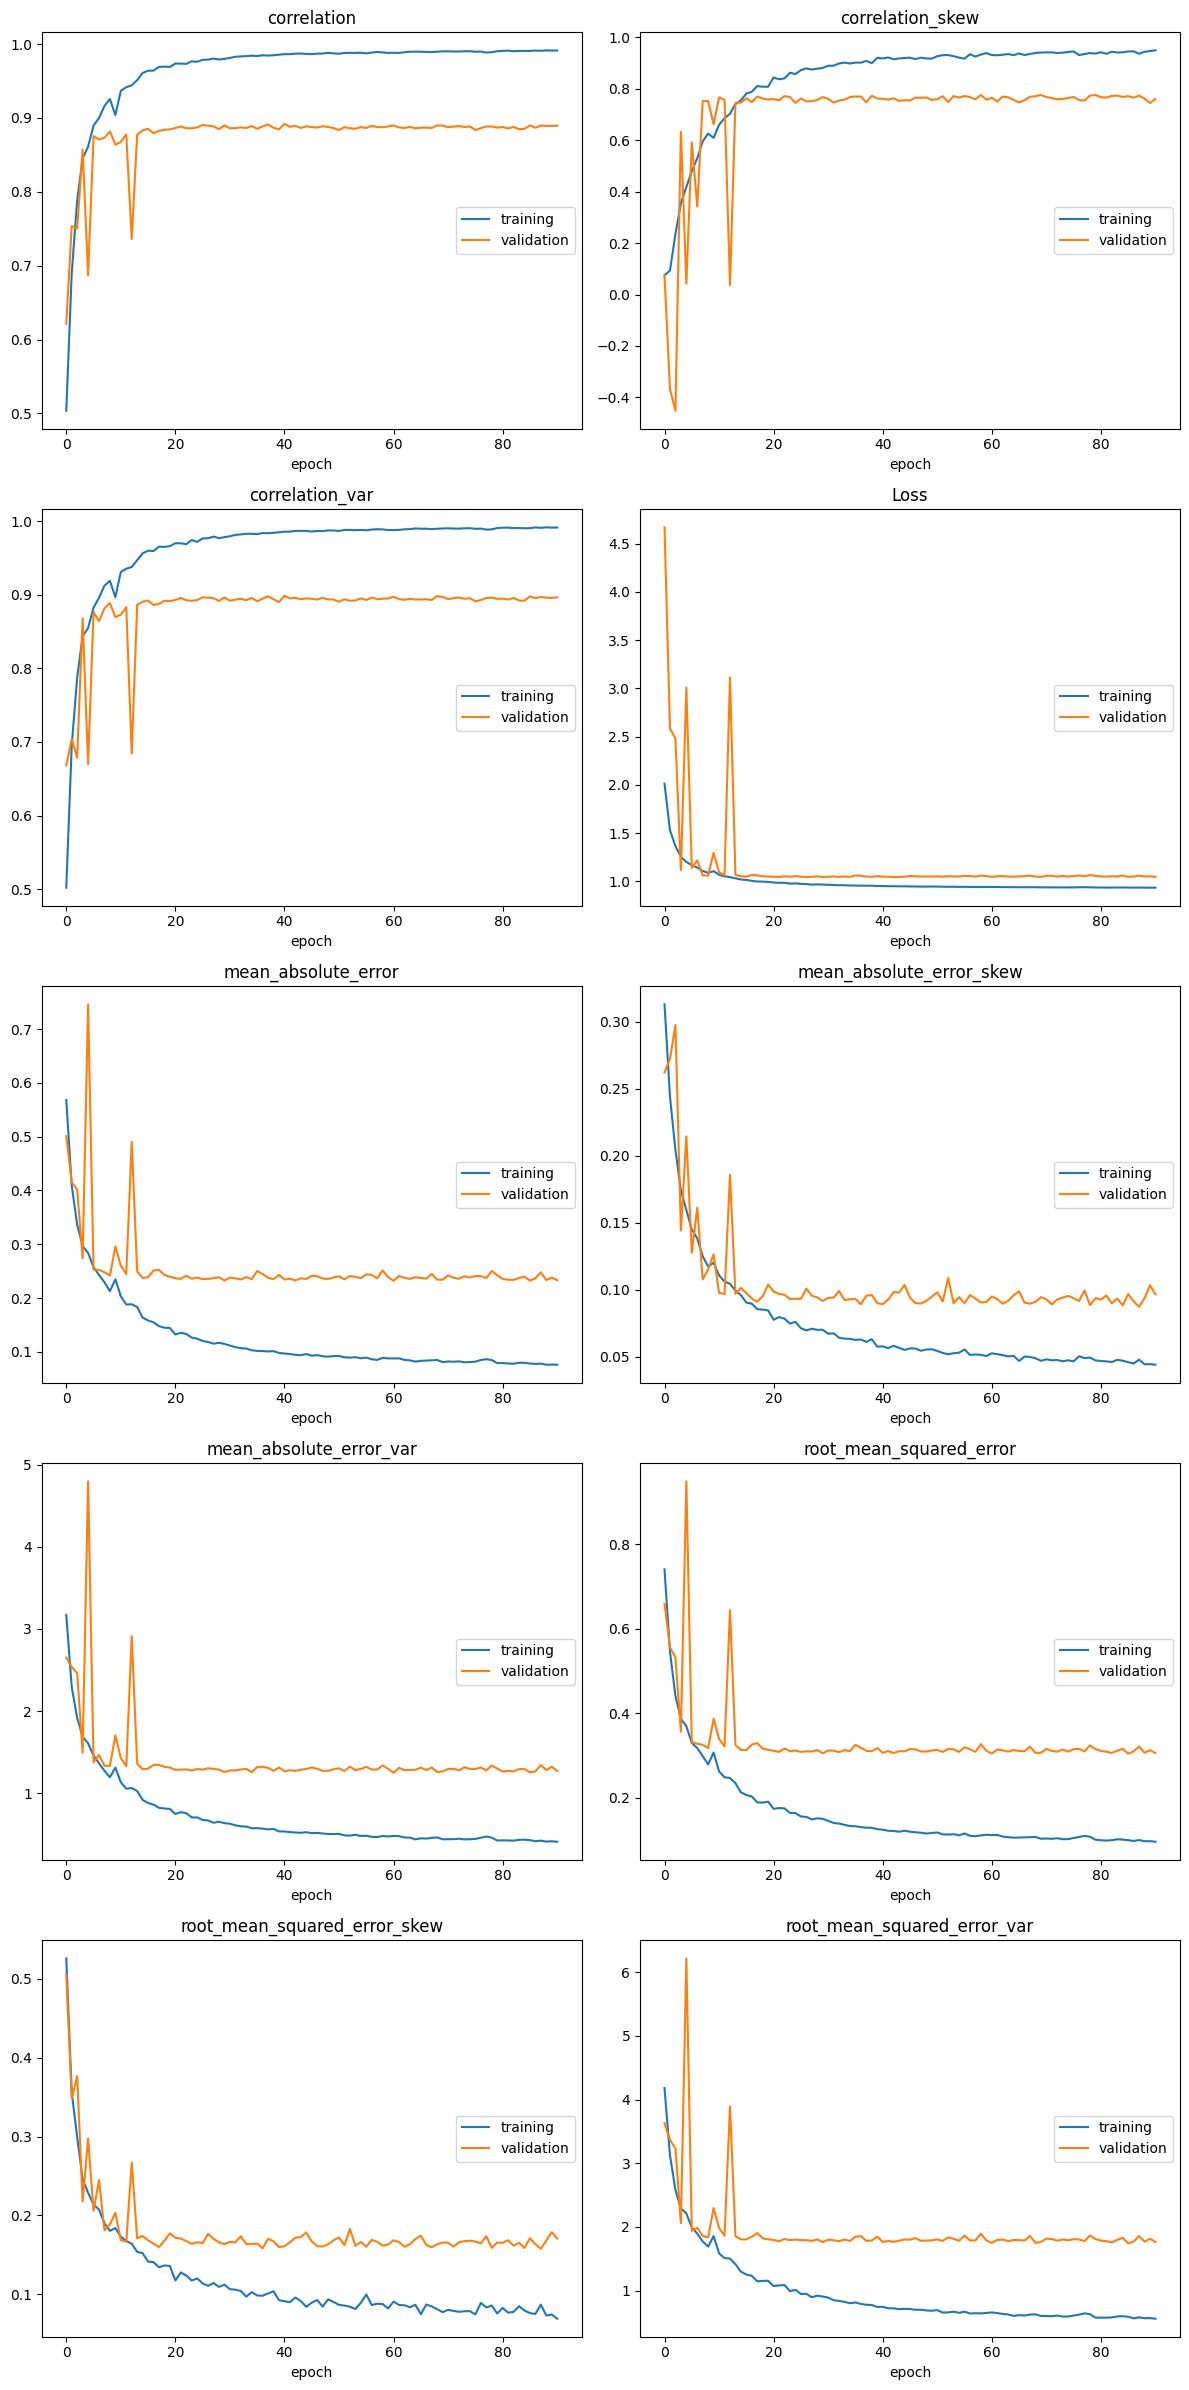

correlation
	training         	 (min:    0.504, max:    0.991, cur:    0.991)
	validation       	 (min:    0.621, max:    0.892, cur:    0.889)
correlation_skew
	training         	 (min:    0.075, max:    0.949, cur:    0.949)
	validation       	 (min:   -0.452, max:    0.776, cur:    0.760)
correlation_var
	training         	 (min:    0.502, max:    0.992, cur:    0.991)
	validation       	 (min:    0.668, max:    0.899, cur:    0.897)
Loss
	training         	 (min:    0.935, max:    2.014, cur:    0.935)
	validation       	 (min:    1.044, max:    4.670, cur:    1.047)
mean_absolute_error
	training         	 (min:    0.076, max:    0.568, cur:    0.076)
	validation       	 (min:    0.232, max:    0.746, cur:    0.233)
mean_absolute_error_skew
	training         	 (min:    0.044, max:    0.313, cur:    0.044)
	validation       	 (min:    0.087, max:    0.298, cur:    0.096)
mean_absolute_error_var
	training         	 (min:    0.411, max:    3.172, cur:    0.411)
	validation       	 (mi

6.240077381666682

In [5]:
metrics = [losses.MeanAbsoluteError(n=n),
           losses.RootMeanSquaredError(n=n),
           losses.PearsonCorrelation(n=n),
           losses.MeanAbsoluteError(n=n, mode="var"),
           losses.RootMeanSquaredError(n=n, mode="var"),
           losses.PearsonCorrelation(n=n, mode="var"),
           losses.MeanAbsoluteError(n=n, mode="skew"),
           losses.RootMeanSquaredError(n=n, mode="skew"),
           losses.PearsonCorrelation(n=n, mode="skew")]

#loss = tf.keras.losses.MeanSquaredError()
loss = tf.keras.losses.CategoricalCrossentropy()
#loss = losses.SquaredEarthMoversDistance()

#dataset.shuffle()
build.compile(model, loss, metrics=metrics, learning_rate=0.0006)
build.train(
    model, 
    dataset.train, 
    dataset.test,
    monitor="val_correlation",
    callbacks=[PlotLossesKerasTF()]
)

In [6]:
np.round(model.evaluate(dataset.test), 6)

69/69 [==============================] - 1s 13ms/step - loss: 1.0499 - mean_absolute_error: 0.2345 - root_mean_squared_error: 0.3066 - correlation: 0.8919 - mean_absolute_error_var: 1.2688 - root_mean_squared_error_var: 1.7632 - correlation_var: 0.8987 - mean_absolute_error_skew: 0.0891 - root_mean_squared_error_skew: 0.1609 - correlation_skew: 0.7606


array([1.04989 , 0.234488, 0.306565, 0.891946, 1.268758, 1.763198,
       0.898692, 0.089095, 0.160887, 0.760599])